# Flight Predictor

In [1]:
!pip install chart-studio
!pip install cufflinks


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# install dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot # allowsw interactive plots using plotly
import cufflinks # allows access to plot and iplot from plotly charts
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset , load the train data

df = pd.read_excel('Data_Train.xlsx')

In [3]:
# show the first 5 of the dataframe

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# look through the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

In [5]:
# the shape of the dataframe
df.shape

(10683, 11)

In [6]:
# check the datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
# see how many unique variables in eahc columns
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [8]:
# see the describtive statistic of the numeric column
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# check for mull values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Airline'].value_counts() ## checking for airline data

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

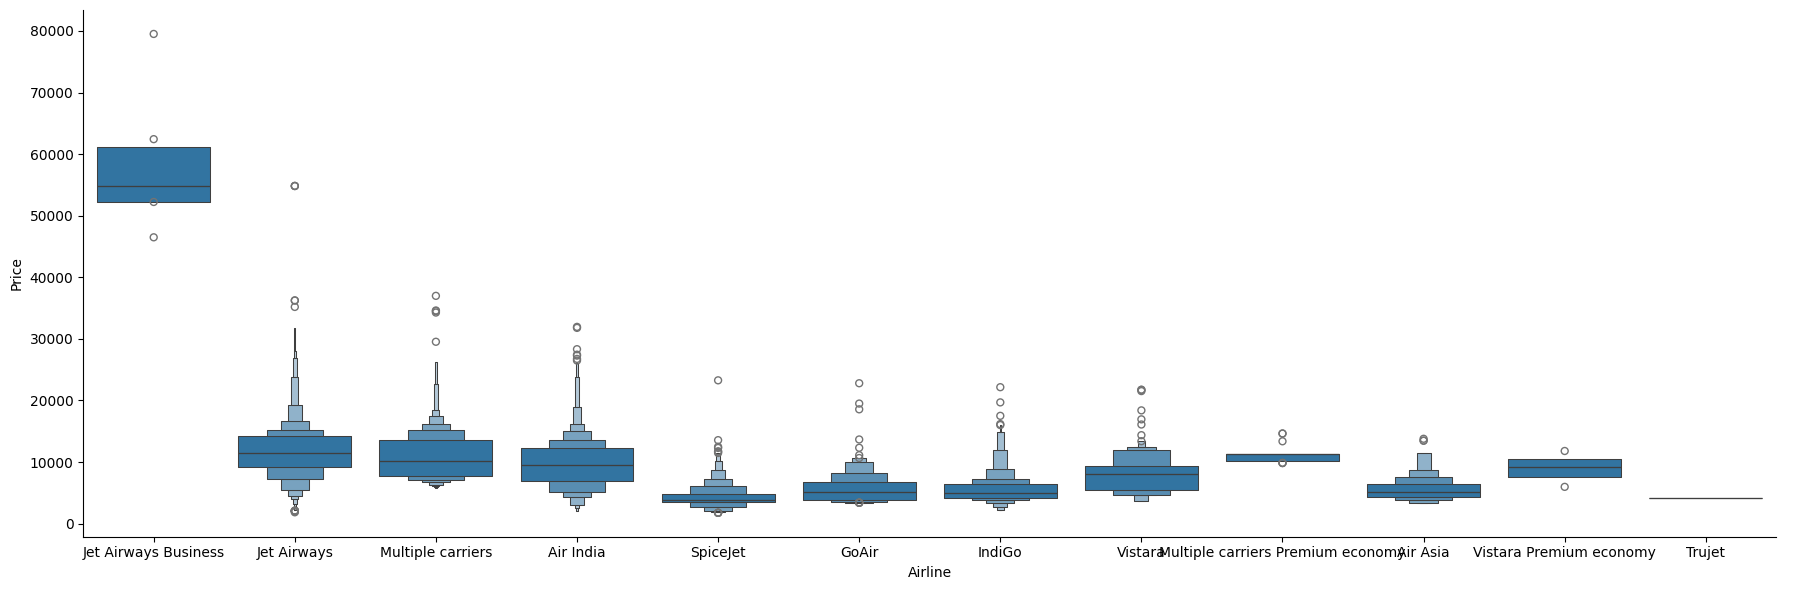

In [11]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [13]:
df['Source'].value_counts() ## checking for Source

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

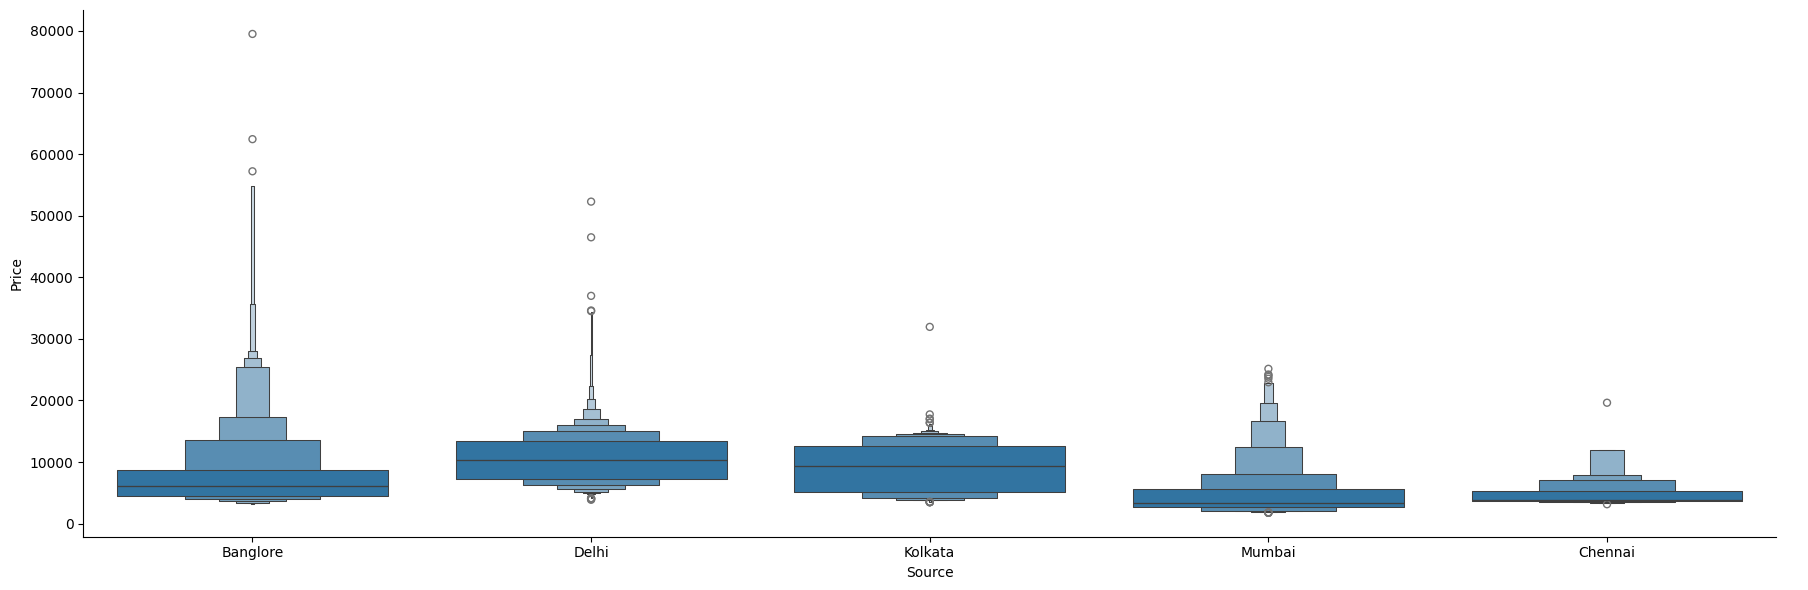

In [14]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [15]:
df['Destination'].value_counts() ## checking for Destination

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

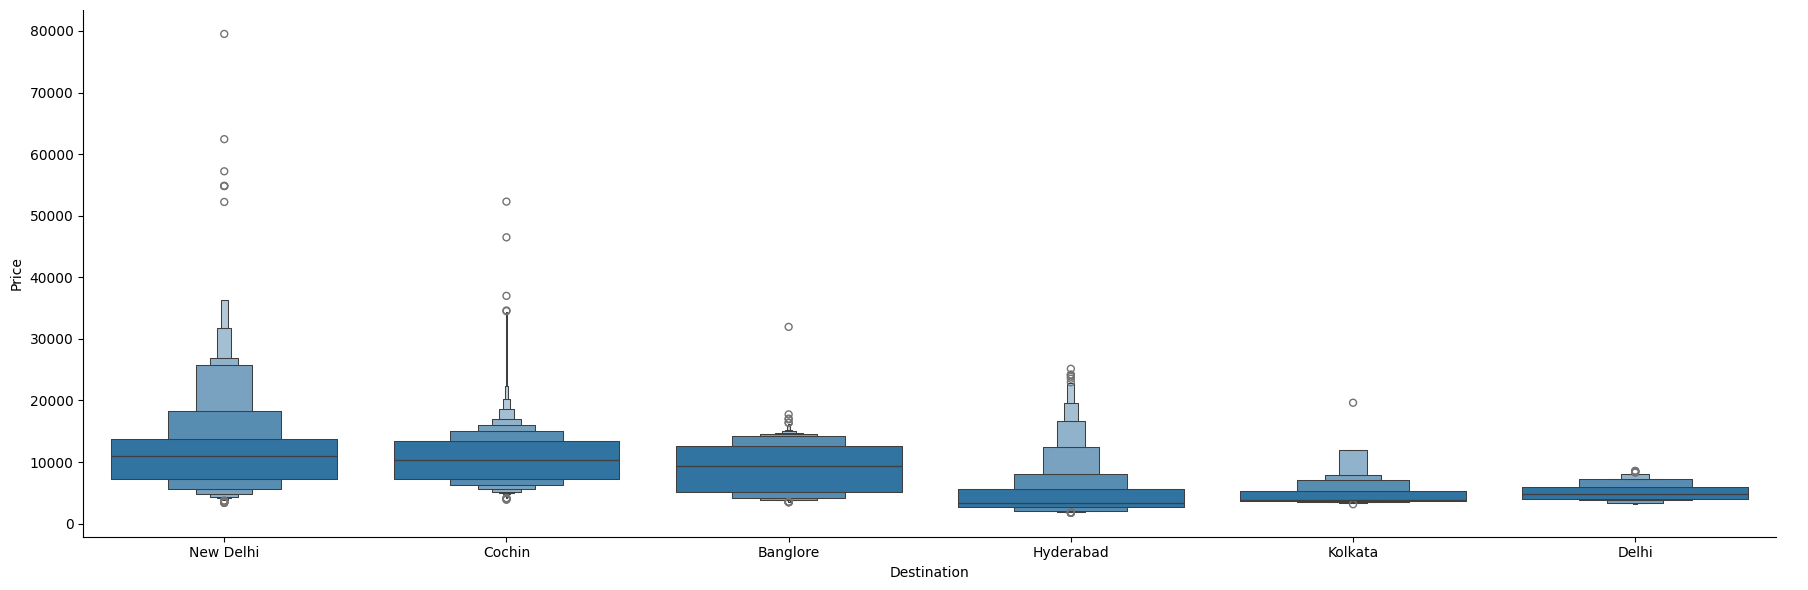

In [16]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [17]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

# Automated Exploratory data
using pandas profiling from ydata

In [12]:
!pip install ydata-profiling


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas_profiling as pf

C:\Users\ayomi\AppData\Local\Temp\ipykernel_55308\3468475291.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [20]:
# generatae a profile report
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 34.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# drop the missign values as they are less than 5%

df.dropna(how='any', inplace = True)
#check to make sure there is no more null
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

## Date of Journey

In [22]:

# change date_of_journey into a datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],dayfirst=True)


# creat a column for the day
df['Day_of_journey'] = (df['Date_of_Journey']).dt.day
# cretae a column for the month
df['Month_of_journey'] = (df['Date_of_Journey']).dt.month

In [23]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [24]:
# drop the date_of_journey as it is no longer needed
df.drop(['Date_of_Journey'],axis =1,inplace = True)


## Department Time

In [25]:
# turn dep_time into datetime, 
# create new columns for hour and minute

df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\1770271965.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\1770271965.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
# we can drop the Dep time now

df.drop(['Dep_Time'],axis =1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


## Arrival Time

In [29]:
# sort out the arrival time
# create new column for hour and minute
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\1306682180.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\1306682180.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [30]:
# drop the arrival tiem as it is no longer needed
df.drop(['Arrival_Time'],axis = 1, inplace=True)

## Duration time

In [31]:
# spli the duration into 2 using the space 
duration = df['Duration'].str.split(' ',expand=True) 
# if there is no miutes fill it with 00m
duration[1].fillna('00m',inplace=True)
# create a duratrion hour column using the first part
df['duration_hr'] = duration[0].apply(lambda x: x[:-1])
# use the second part to create a duration min column
df['duration_min'] = duration[1].apply(lambda x: x[:-1])

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\3863334579.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
# drop the duration column
df.drop(['Duration'],axis = 1, inplace = True)

In [33]:
# check the dataframe
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Further eda section

## Count of Airlines

In [34]:
#df['Airline'].value_counts()

Airline VS Price

In [35]:
#Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
#plt.figure(figsize=(15,10))
#sns.barplot(Airprices.index,Airprices.values)
#plt.xticks(rotation=270)

In [36]:
#plt.figure(figsize=(18,10))
#sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
#plt.show

# Price based on numnber of stops

In [37]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

In [38]:

#plt.figure(figsize=(18,10))
#ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.show()

Source

In [39]:

df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

Source Vs Price

In [40]:
#plt.figure(figsize=(15,10))
#sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
#plt.show

Destination vs price

In [41]:

#plt.figure(figsize=(15,10))
#sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
#plt.show

heatmap

In [42]:

#plt.figure(figsize=(23,12))
#sns.heatmap(df.corr(),annot=True)

# Applting Onehot Encoding on the categorical variables


In [43]:
# handling the categorical varaibles

# total stops 
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '4 stops':4, '3 stops':3, '2 stops': 2, '1 stop':1})

# Airline
air_dummy = pd.get_dummies(df['Airline'],drop_first = True).astype(int) # for 0 and 1, istead of true and false

# Source and destination
source_dest_dummy = pd.get_dummies(df[['Source','Destination']], drop_first = True).astype(int) # to make sure they are 0 and 1

# add them to the df
df = pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [44]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [45]:
# drop the columns we dont need any more
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [46]:
df.shape

(10682, 32)

# Test Data

In [47]:
df_test = pd.read_excel('Test_set.xlsx')

In [48]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
# change the test date to datetime 

df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'],dayfirst=True)
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month





#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})



C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\745283293.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\745283293.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\745283293.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ayomi\AppData\Local\Temp\ipykernel_40760\745283293.py:17: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

In [50]:
# one hot endocding the tewst data 
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True).astype(int) 
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True).astype(int) 
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [51]:
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,1,No info,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,1,No info,12,5,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,1,No info,21,5,8,0,21,0,13,00
4,0,0,0,0,0,0,0,0,0,0,...,0,No info,24,6,23,55,2,45,2,50


In [52]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

# train test split

In [53]:
# train test split
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 32)
test_shape (2671, 28)


# Model Building and Hyperparamater Tuning

In [54]:
# drop the variables we dont want from the independent variable 
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
 # price is are dependent what we wan ttpo find out
y=df['Price']

In [55]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50) # random satate so it can be reproduced

# Extra tree Regression Model

In [56]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7646127698483989

# Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.804269108364636

# Hyperparamater tuning 


In [58]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [59]:
rCV.fit(X_train,y_train)

c:\Users\ayomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ayomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ayomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ayomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [60]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12112.97646339,  4356.60974574,  6217.39041459, ...,
       11584.48891089, 10293.14405042,  8686.56850105])

In [61]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1283.2407686389545
MSE 4316352.268152111


In [62]:

r2_score(y_test,rf_pred)

0.789791541086788

# CatBoostRegressor

In [63]:

#!pip install catboost

In [64]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4467.2193634	total: 146ms	remaining: 2m 26s
1:	learn: 4320.2179548	total: 148ms	remaining: 1m 13s
2:	learn: 4191.7303259	total: 150ms	remaining: 49.7s
3:	learn: 4059.9110626	total: 151ms	remaining: 37.6s
4:	learn: 3935.8887082	total: 153ms	remaining: 30.4s
5:	learn: 3816.1767717	total: 154ms	remaining: 25.5s
6:	learn: 3709.6924115	total: 156ms	remaining: 22.1s
7:	learn: 3609.4339698	total: 157ms	remaining: 19.5s
8:	learn: 3528.9671570	total: 158ms	remaining: 17.5s
9:	learn: 3438.6495212	total: 160ms	remaining: 15.9s
10:	learn: 3369.5111338	total: 162ms	remaining: 14.6s
11:	learn: 3290.2755570	total: 163ms	remaining: 13.4s
12:	learn: 3222.5415281	total: 165ms	remaining: 12.5s
13:	learn: 3158.3259180	total: 166ms	remaining: 11.7s
14:	learn: 3100.3168004	total: 168ms	remaining: 11s
15:	learn: 3047.9189413	total: 169ms	remaining: 10.4s
16:	learn: 2998.3980700	total: 171ms	remaining: 9.87s
17:	learn: 2960.7659419	total: 172ms	remaining: 9.38s
18:	lear

In [65]:
# predict using catboost
cat_pred=cat.predict(X_test)

In [66]:
# r2_score of the regressor
r2_score(y_test,cat_pred)

0.8312749732288724

# Lightgbm

In [67]:
#!pip install lightgbm

In [68]:
# change the duration hr and minutes to int
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [69]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 25
[LightGBM] [Info] Start training from score 9056.953189


LGBMRegressor()

In [70]:
# predict and get the score
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8126090199151045

# Xgboost

In [71]:
#!pip install xgboost

In [72]:
# initaslise and fit the model
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [73]:
# predict and score
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8144082213870596

In [74]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Route', 'Total_Stops', 'Additional_Info',
       'Price', 'Day_of_journey', 'Month_of_journey', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

# cleaned dataset

In [75]:

deploy_df=df.drop(['Route','Additional_Info'],axis=1)
deploy_df.to_csv('deploy_df')

In [76]:
deploy_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45


# create the requirment.txt file

In [77]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
